# Лаборатораня работа №2: Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1) Обработка пропусков в данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [6]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['job_id' 'telecommuting' 'has_company_logo' 'has_questions' 'fraudulent']


In [7]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['title' 'location' 'department' 'salary_range' 'company_profile'
 'description' 'requirements' 'benefits' 'employment_type'
 'required_experience' 'required_education' 'industry' 'function']


In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

job_id - 0%
title - 0%
location - 2%
department - 65%
salary_range - 84%
company_profile - 19%
description - 0%
requirements - 15%
benefits - 40%
telecommuting - 0%
has_company_logo - 0%
has_questions - 0%
employment_type - 19%
required_experience - 39%
required_education - 45%
industry - 27%
function - 36%
fraudulent - 0%


In [9]:
#Выберем числовые колонки с пропущенными значениями
#Цикл по колонкам датасета
num_cols =[]
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Столбец location. Тип данных object. Количество пустых значений 346.
Столбец department. Тип данных object. Количество пустых значений 11547.
Столбец salary_range. Тип данных object. Количество пустых значений 15012.
Столбец company_profile. Тип данных object. Количество пустых значений 3308.
Столбец description. Тип данных object. Количество пустых значений 1.
Столбец requirements. Тип данных object. Количество пустых значений 2695.
Столбец benefits. Тип данных object. Количество пустых значений 7210.
Столбец employment_type. Тип данных object. Количество пустых значений 3471.
Столбец required_experience. Тип данных object. Количество пустых значений 7050.
Столбец required_education. Тип данных object. Количество пустых значений 8105.
Столбец industry. Тип данных object. Количество пустых значений 4903.
Столбец function. Тип данных object. Количество пустых значений 6455.


Для данного датасета наличие пустых значений во многих столбцах является нормой. Следует отбросить пустые строки для столбцов `industry`, `function`, `descriprion`, `requirements`. В остальных столбцах заменим пропущенные значения: на `_MISSING_` для нечисловых признаков.

In [10]:
df = df.dropna(subset=['industry'], axis=0)
df = df.dropna(subset=['function'], axis=0)
df = df.dropna(subset=['description'], axis=0)
df = df.dropna(subset=['requirements'], axis=0)

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

job_id - 0%
title - 0%
location - 1%
department - 58%
salary_range - 76%
company_profile - 15%
description - 0%
requirements - 0%
benefits - 29%
telecommuting - 0%
has_company_logo - 0%
has_questions - 0%
employment_type - 2%
required_experience - 12%
required_education - 21%
industry - 0%
function - 0%
fraudulent - 0%


In [12]:
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    if temp_null_count>0:
        df[col] = df[col].fillna(0)

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

job_id - 0%
title - 0%
location - 0%
department - 0%
salary_range - 0%
company_profile - 0%
description - 0%
requirements - 0%
benefits - 0%
telecommuting - 0%
has_company_logo - 0%
has_questions - 0%
employment_type - 0%
required_experience - 0%
required_education - 0%
industry - 0%
function - 0%
fraudulent - 0%


## 2) Кодирование категориальных признаков

In [14]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",0,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9739 entries, 1 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               9739 non-null   int64 
 1   title                9739 non-null   object
 2   location             9739 non-null   object
 3   department           9739 non-null   object
 4   salary_range         9739 non-null   object
 5   company_profile      9739 non-null   object
 6   description          9739 non-null   object
 7   requirements         9739 non-null   object
 8   benefits             9739 non-null   object
 9   telecommuting        9739 non-null   int64 
 10  has_company_logo     9739 non-null   int64 
 11  has_questions        9739 non-null   int64 
 12  employment_type      9739 non-null   object
 13  required_experience  9739 non-null   object
 14  required_education   9739 non-null   object
 15  industry             9739 non-null   object
 16  funct

In [16]:
category_cols1 = ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 
                 'benefits', 'required_experience', 'required_education', 'industry', 'function']

In [17]:
print("Количество уникальных значений\n")
for col in category_cols1:
    print(f'{col}: {df[col].unique().size}')

Количество уникальных значений

title: 6417
location: 1977
department: 890
salary_range: 752
company_profile: 1320
description: 8468
requirements: 7945
benefits: 4326
required_experience: 8
required_education: 14
industry: 131
function: 37


In [26]:
category_cols = []
for col in category_cols1:
    unic = int(df[col].unique().size)
    if unic<1000:
        category_cols.append(col)
print(category_cols)

['department', 'salary_range', 'required_experience', 'required_education', 'industry', 'function']


In [27]:
for col in category_cols:
    df = pd.concat([df, pd.get_dummies(df[col])], axis=1)

In [28]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",0,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3) Масштабирование данных

В текущем датасете не нашлось признаков для масштабирования, поэтому используем другой датасет для выполнения пункта.

In [38]:
data = pd.read_csv('fortune500.csv')
data.columns = ['year', 'rank', 'company', 'revenue', 'profit']
data.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MinMax масштабирование

In [47]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['revenue']])

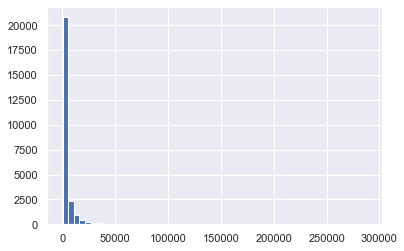

In [50]:
plt.hist(data['revenue'], 54)
plt.show()

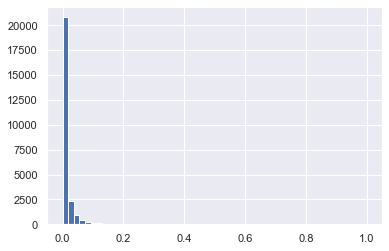

In [51]:
plt.hist(sc1_data, 54)
plt.show()

Масштабирование данных на основе Z-оценки

In [52]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['revenue']])

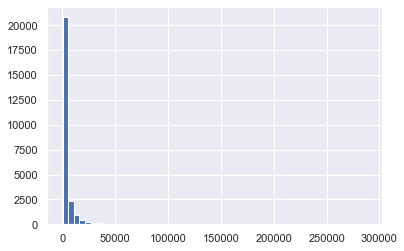

In [54]:
plt.hist(data['revenue'], 54)
plt.show()

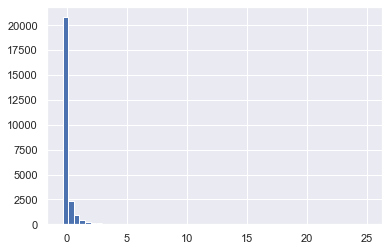

In [55]:
plt.hist(sc2_data, 54)
plt.show()